# Chapter 9 : Tree based methods 

binary tree 

In [1]:
#load the library for svm
library(e1071) 
library(caret) # to train the model
library(MASS)
library(tidyverse)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Loading required package: lattice

Warning message:
"package 'dplyr' was built under R version 4.2.3"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
x dplyr::select() masks MASS::select()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Boston 데이터셋의 설명을 간단히 정리해줄게! 이 데이터셋은 보스턴 주택 가격에 영향을 미치는 다양한 요인들을 포함하고 있어. 데이터셋의 각 변수는 아래와 같은 의미를 가지고 있어:

crim: 범죄율 (per capita crime rate by town)

zn: 25,000 평방피트 이상의 거주 지역 비율 (proportion of residential land zoned for lots over 25,000 sq. ft)

indus: 비소매 상업 지역 비율 (proportion of non-retail business acres per town)

chas: 찰스강 경계 여부 (1이면 강 인접, 0이면 인접하지 않음) (Charles River dummy variable; 1 if tract bounds river; 0 otherwise)

nox: 질소 산화물 농도 (10 ppm 단위) (nitrogen oxides concentration (parts per 10 million))

rm: 주거지당 방의 평균 개수 (average number of rooms per dwelling)

age: 1940년 이전에 지어진 자택의 비율 (proportion of owner-occupied units built prior to 1940)

dis: 5개의 보스턴 고용 센터까지의 가중 거리 (weighted distances to five Boston employment centres)

rad: 고속도로 접근성 지수 (index of accessibility to radial highways)

tax: 재산세율 (10,000달러당) (full-value property-tax rate per $10,000)

ptratio: 타운별 학생-교사 비율 (pupil-teacher ratio by town)

black: 1000(Bk - 0.63)^2, 여기서 Bk는 흑인 비율 (proportion of Black population by town)

lstat: 낮은 사회적 지위를 가진 인구의 비율 (percentage of lower status of the population)

medv: 자가 주택의 중앙값 (보스턴 주택의 중앙값, $1000s 단위) (Median value of owner-occupied homes in $1000s)
이 데이터는 회귀 분석을 통해 주택 가격에 영향을 미치는 주요 요인을 분석할 때 자주 사용되는 데이터셋이야.

In [2]:
data(Boston)
str(Boston)
set.seed(252)

index = createDataPartition(Boston$medv, p = 0.8, list = FALSE)
train.dat = Boston[index,]
test.dat = Boston[-index,]


'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


[1] 3.265095

[1] 4.637794

[1] 0.7351787

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


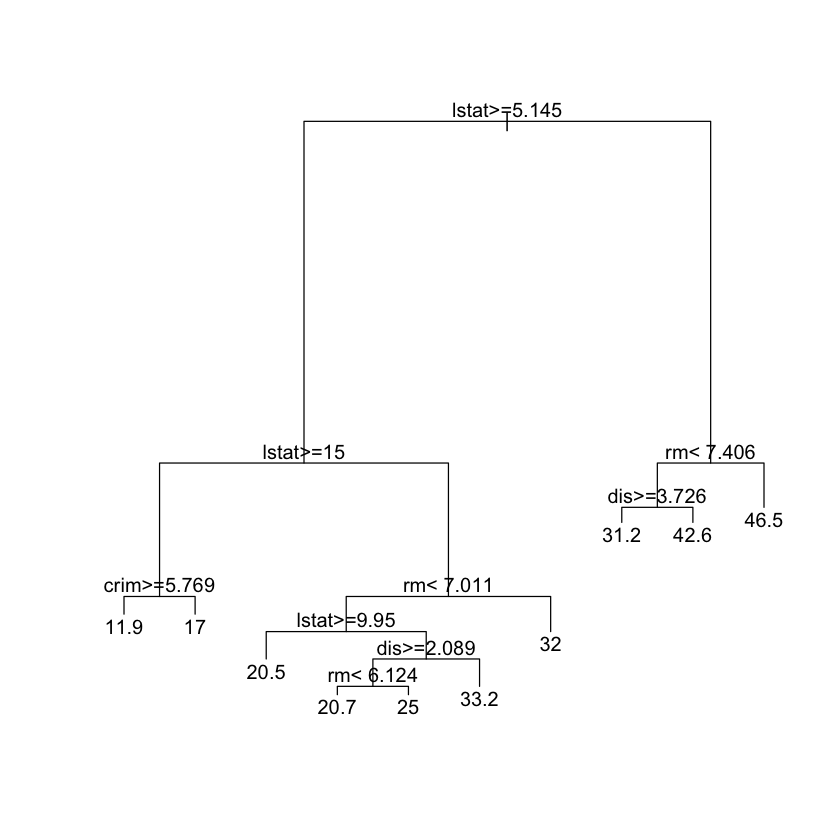

In [3]:
#rpart : recursive partitioning and regression trees
library(rpart)

#build a CART on the training data
fit.rpart = rpart(medv ~ ., data = train.dat)

# To show the regression tree
plot(fit.rpart)
text(fit.rpart, digits = 3)

#make predict on the testing data
yhat = predict(fit.rpart, newdata = test.dat)

#find the MAE (mean absolute error) on the testing data

caret ::MAE(test.dat$medv,yhat)
caret ::RMSE(test.dat$medv,yhat)
caret ::R2(test.dat$medv,yhat)

train.dat[2,]

# no : right side
# yes : left side


CART 

407 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 367, 366, 367, 366, 367, 365, ... 
Resampling results across tuning parameters:

  cp     RMSE      Rsquared   MAE     
  1e-06  4.402098  0.7590736  3.000907
  2e-04  4.402098  0.7590736  3.000907
  1e-03  4.412117  0.7590834  2.979013
  2e-03  4.418661  0.7580291  2.971244

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 2e-04.

,cp
,<dbl>
2,2e-04


[1] 3.265095

[1] 4.637794

[1] 0.7351787

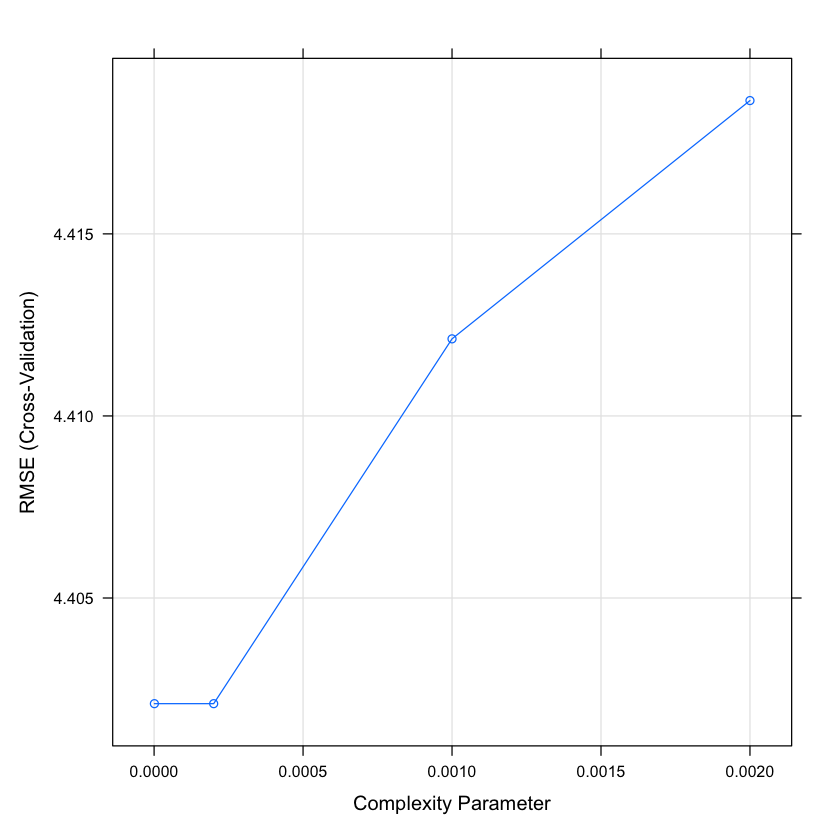

In [4]:
#select the optimal CP (tuning parameter) using R train function 

set.seed(527)
#cross valiation : 10 folder cross validation 
ctrl = trainControl(method = "cv", number = 10)

#tuning parameter : the complexity parameter(cp), 
#which impose a penalty to the tree for having two many splits.
# the default value is 0.01. the smaller the cp, the larger the tree
# the larger the cp, the smaller the tree
# A too small value of cp leads to overfitting and a too large cp will a too simple tree. both cases decrease the accuracy of the model
# an optimal cp value can be estimated by testing different cp values and using cross-validation approach

#to create the searching grid
tgrid = expand.grid (
    cp=c(0.000001,0.0002,0.001,0.002)
)

fit.rpart1 = train(medv~., data=train.dat,
                   method="rpart",
                   trControl=ctrl,
                   tuneGrid=tgrid)  
fit.rpart1

#the best tuning parameter 
fit.rpart1$bestTune

plot(fit.rpart1) #cp and RMSE

caret ::MAE(test.dat$medv,yhat)
caret ::RMSE(test.dat$medv,yhat)
caret ::R2(test.dat$medv,yhat)

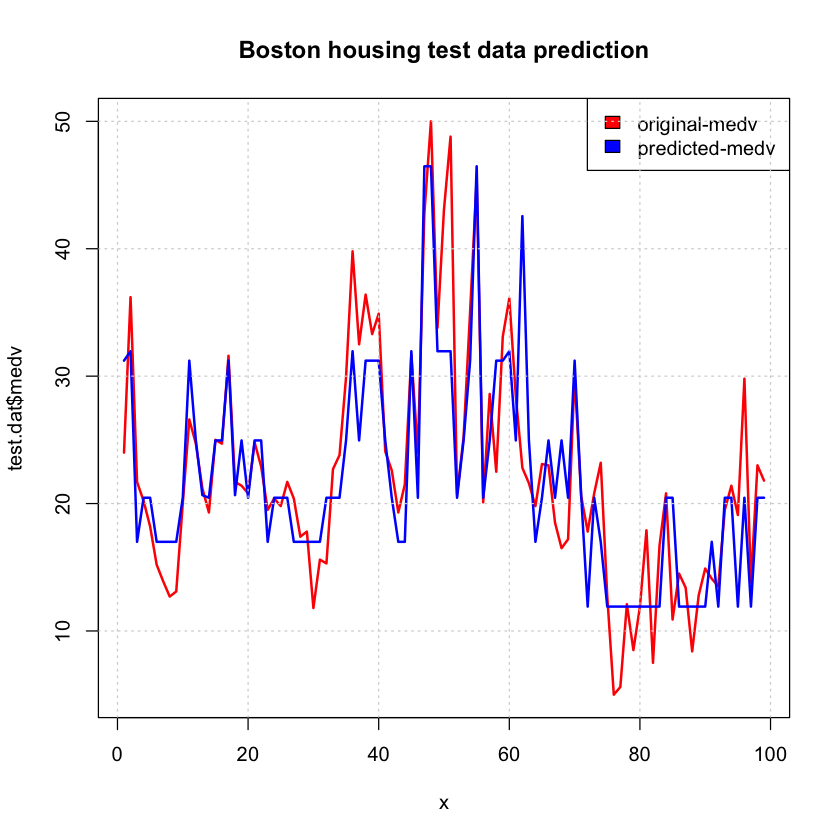

In [5]:
# line plots to see the performance
# predicted value vs observed values

x = 1:length(yhat)
plot(x, test.dat$medv,col="red",type = "l",lwd=2, 
    main = "Boston housing test data prediction")
lines(x,yhat,col="blue",lwd=2)
legend("topright",legend=c("original-medv","predicted-medv"),
        fill = c("red","blue"),col=2:3, adj=c(0,0.6))
grid()

# CART for classification 

example : 


The purpose is to construct a predictive model to predict if a person has "diabetes" or not based on all other features in the data. 

Response : diabetes ( neg or positive)
a binary classification problem. 

data(PimaIndianDiabetes2)

In [6]:
library(caret) #ML model building package
library(MASS) #modern applied statistics with S
#library(randomForest)

library(mlbench)
data(PimaIndiansDiabetes)
dat = PimaIndiansDiabetes
str(dat)


Warning message:
"package 'mlbench' was built under R version 4.2.3"


'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


[1] 3.265095

[1] 4.637794

[1] 0.7351787

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


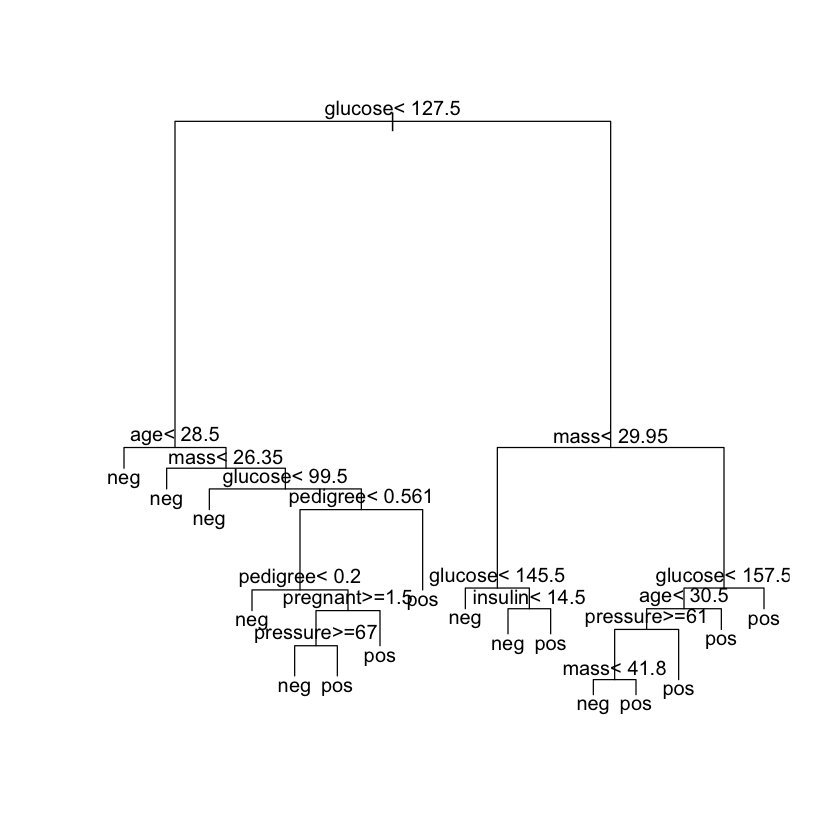

In [7]:
#build a CART on the training data

library(rpart)
fit.rpart = rpart(diabetes ~ ., data = dat)

# To show the regression tree
plot(fit.rpart)
text(fit.rpart, digits = 3)

#make predict on the testing data
#yhat = predict(fit.rpart, newdata = test.dat)

#find the MAE (mean absolute error) on the testing data

caret ::MAE(test.dat$medv,yhat)
caret ::RMSE(test.dat$medv,yhat)
caret ::R2(test.dat$medv,yhat)

train.dat[2,]

In [8]:
#make a predict on the data

yhat= predict(fit.rpart, newdata = dat,type = "class")

#confusion matrix 
#table(yhat, dat$diabetes) #simple but not informative

confusionMatrix(yhat, reference = dat$diabetes)



Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 449  72
       pos  51 196
                                         
               Accuracy : 0.8398         
                 95% CI : (0.812, 0.8651)
    No Information Rate : 0.651          
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.641          
                                         
 Mcnemar's Test P-Value : 0.07133        
                                         
            Sensitivity : 0.8980         
            Specificity : 0.7313         
         Pos Pred Value : 0.8618         
         Neg Pred Value : 0.7935         
             Prevalence : 0.6510         
         Detection Rate : 0.5846         
   Detection Prevalence : 0.6784         
      Balanced Accuracy : 0.8147         
                                         
       'Positive' Class : neg            
                                         

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 449  72
       pos  51 196
                                         
               Accuracy : 0.8398         
                 95% CI : (0.812, 0.8651)
    No Information Rate : 0.651          
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.641          
                                         
 Mcnemar's Test P-Value : 0.07133        
                                         
            Sensitivity : 0.8980         
            Specificity : 0.7313         
         Pos Pred Value : 0.8618         
         Neg Pred Value : 0.7935         
             Prevalence : 0.6510         
         Detection Rate : 0.5846         
   Detection Prevalence : 0.6784         
      Balanced Accuracy : 0.8147         
                                         
       'Positive' Class : neg            
                                         

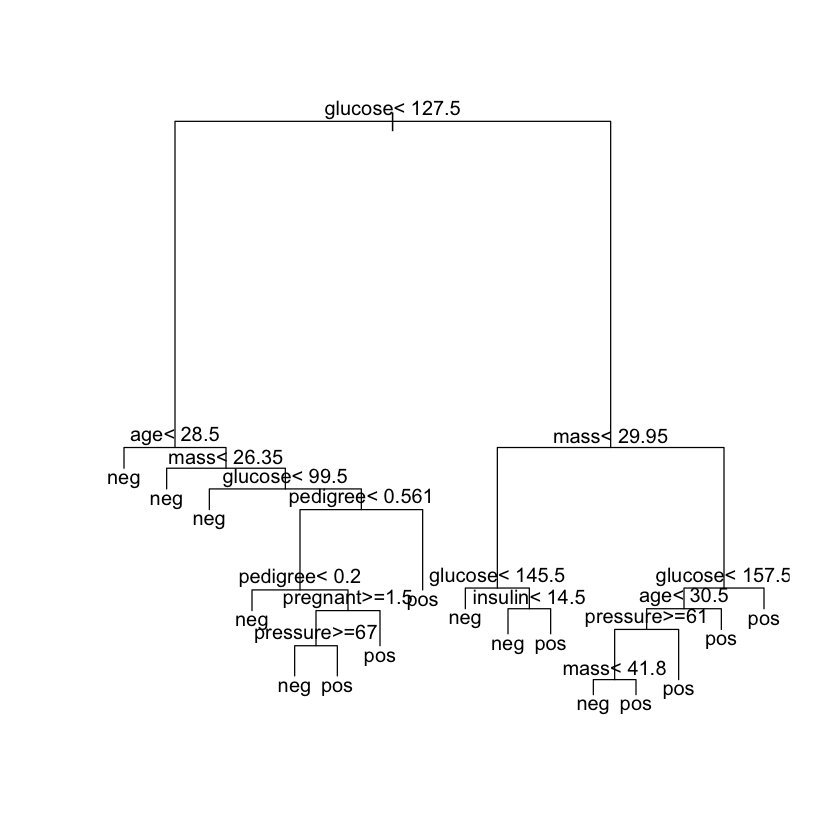

In [9]:
cntrl = rpart.control(minsplit = 20, minbucket = 5, maxdepth = 20)
fit = rpart(diabetes ~ ., data = dat, method = "class",control = cntrl)

plot(fit)
text(fit, digits = 3)

#make a predict on the data
yhat = predict(fit, newdata = dat, type = "class")

#confusion matrix
confusionMatrix(yhat, reference = dat$diabetes)

In [10]:
library(caret)

dat=PimaIndiansDiabetes
set.seed(252)

index = createDataPartition(dat$diabetes, p = 0.8, list = FALSE)
train.dat=dat[index,]
test.dat=dat[-index,]


Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  88   7
       pos  12  46
                                          
               Accuracy : 0.8758          
                 95% CI : (0.8129, 0.9236)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 3.566e-10       
                                          
                  Kappa : 0.7317          
                                          
 Mcnemar's Test P-Value : 0.3588          
                                          
            Sensitivity : 0.8800          
            Specificity : 0.8679          
         Pos Pred Value : 0.9263          
         Neg Pred Value : 0.7931          
             Prevalence : 0.6536          
         Detection Rate : 0.5752          
   Detection Prevalence : 0.6209          
      Balanced Accuracy : 0.8740          
                                          
       'Positive' Class : neg             
                              

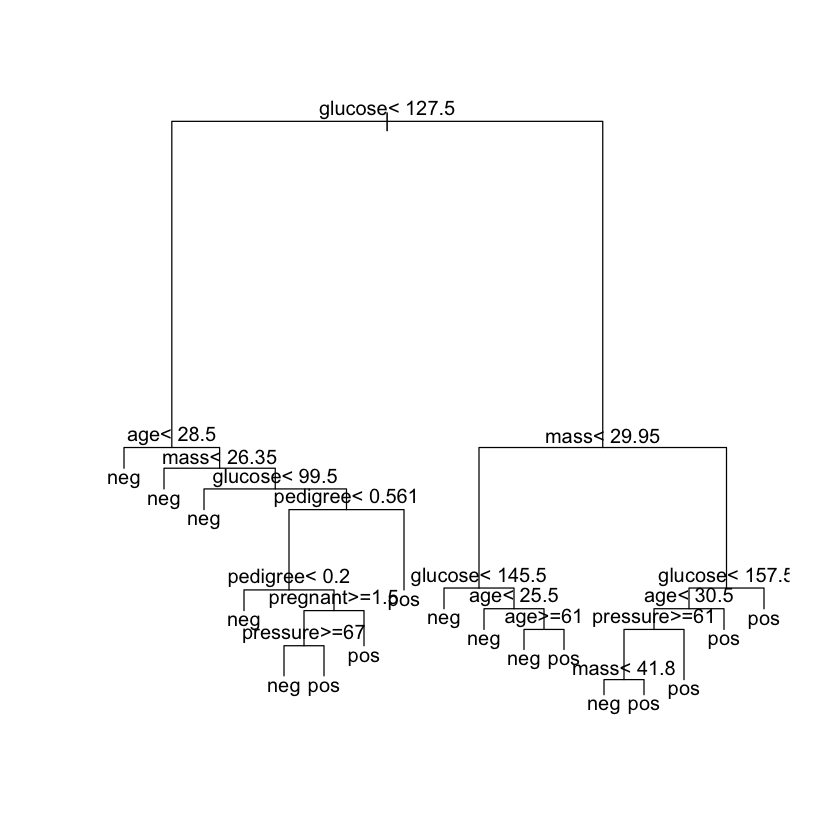

In [11]:
cntrl = rpart.control(minsplit = 10, minbucket = 3, maxdepth = 20)
fit = rpart(diabetes ~ ., data = dat, method = "class",control = cntrl)

plot(fit)
text(fit, digits = 3)

#make a predict on the data
yhat = predict(fit, newdata = test.dat, type = "class")

#confusion matrix
confusionMatrix(yhat, reference = test.dat$diabetes)

In [12]:
set.seed(527)
ctrl = trainControl(method = "cv", number = 10)

fit.rpart1 = train(diabetes~., data=train.dat,
                   method="rpart",
                   trControl=ctrl,
                   tuneLegnth=10,)  
fit.rpart1

Warning message:
"model fit failed for Fold01: cp=0.02093 Error in (function (formula, data, weights, subset, na.action = na.rpart,  : 
  Argument tuneLegnth not matched
"
Warning message:
"model fit failed for Fold02: cp=0.02093 Error in (function (formula, data, weights, subset, na.action = na.rpart,  : 
  Argument tuneLegnth not matched
"
Warning message:
"model fit failed for Fold03: cp=0.02093 Error in (function (formula, data, weights, subset, na.action = na.rpart,  : 
  Argument tuneLegnth not matched
"
Warning message:
"model fit failed for Fold04: cp=0.02093 Error in (function (formula, data, weights, subset, na.action = na.rpart,  : 
  Argument tuneLegnth not matched
"
Warning message:
"model fit failed for Fold05: cp=0.02093 Error in (function (formula, data, weights, subset, na.action = na.rpart,  : 
  Argument tuneLegnth not matched
"
Warning message:
"model fit failed for Fold06: cp=0.02093 Error in (function (formula, data, weights, subset, na.action = na.rpart,  : 
  Ar

Something is wrong; all the Accuracy metric values are missing:
    Accuracy       Kappa    
 Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA  
 NA's   :3     NA's   :3    


ERROR: Error: Stopping


# Ensemble models 

## Bagging (Bootstrap aggregation) 
## Bootstrap 


In [21]:
library(ipred)

set.seed(123)

#train bagged model
#"minsplit" : the parameter determines the minimum number of observations that must exist in a node in order for a split to be attempted
fit.bag1 = bagging(diabetes ~ ., data = train.dat, nbagg=100, coob = TRUE,
                     control = rpart.control(minsplit = 2, cp=0))

#accuracy is improved a bit

#make a predict on the testing data
yhat = predict(fit.bag1, newdata = test.dat)

#confusion matrix
confusion.mat = confusionMatrix(yhat, reference = test.dat$diabetes)
confusion.mat

#variable importance
varImp(fit.bag1)

#
plot(fit.bag1)

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  82  15
       pos  18  38
                                          
               Accuracy : 0.7843          
                 95% CI : (0.7106, 0.8466)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.0003018       
                                          
                  Kappa : 0.5299          
                                          
 Mcnemar's Test P-Value : 0.7277235       
                                          
            Sensitivity : 0.8200          
            Specificity : 0.7170          
         Pos Pred Value : 0.8454          
         Neg Pred Value : 0.6786          
             Prevalence : 0.6536          
         Detection Rate : 0.5359          
   Detection Prevalence : 0.6340          
      Balanced Accuracy : 0.7685          
                                          
       'Positive' Class : neg             
                              

,Overall
,<dbl>
age,128.94678
glucose,168.70601
insulin,61.75409
mass,151.46212
pedigree,113.85009
pregnant,102.89872
pressure,86.92694
triceps,70.15543


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


In [31]:
# use the train function in caret package 
# to select the optimal number of trees

set.seed(527)

ctrl = trainControl(method = "cv", number = 10)

fit.bagging = train(diabetes ~., data=train.dat,
                    method="treebag",
                    trControl=ctrl,
                    tuneLength=20)

fit.bagging # accuracy is not good 
plot(fit.bagging)

# train a bagging model 
fit.bagging2 = train(x = 
                     diabetes ~., data=train.dat,
                     method="treebag",
                     trControl=ctrl,
                     nbagg=100,
                     control = rpart.control(minsplit = 2, cp=0)) 

fit.bagging2

Bagged CART 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 553, 553, 554, 553, 554, ... 
Resampling results:

  Accuracy  Kappa    
  0.728477  0.3882905


ERROR: Error in plot.train(fit.bagging): There are no tuning parameters for this model.


In [38]:
# build a predictive model using bagging to predict "species" in iris data

# 1. split the data 
# 2. using the train data, build a rpart model 
# 3. using bagging function 
# 4. using caret train function.
# compare the accuracy on the testing data

index = createDataPartition(iris$Species, p = 0.8, list = FALSE)
train.dat = iris[index,]
test.dat = iris[-index,]

#build a rpart model
fit.rpart = rpart(Species ~ ., data = train.dat)

#make a predict on the testing data
yhat = predict(fit.rpart, newdata = test.dat, type = "class")

#confusion matrix
confusionMatrix(yhat, reference = test.dat$Species)

#train a bagging model
fit.bag = bagging(Species ~ ., data = train.dat, nbagg = 100, coob = TRUE,
                  control = rpart.control(minsplit = 2, cp = 0))

# using caret train function 

set.seed(527)
ctrl = trainControl(method = "cv", number = 10)

fit.bagging = train(Species ~ ., data = train.dat,
                    method = "treebag",
                    trControl = ctrl,
                    #tuning parameter 
                    tuneLength = 20
                    )

fit.bagging

# compare the accuracy on the testing data

yhat = predict(fit.bagging, newdata = test.dat)

confusionMatrix(yhat, reference = test.dat$Species)

# variable importance
varImp(fit.bagging)

plot(fit.bagging)

varImp(fit.bagging) %>% plot()



Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         1
  virginica       0          1         9

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           0.9000
Specificity                 1.0000            0.9500           0.9500
Pos Pred Value              1.0000            0.9000           0.9000
Neg Pred Value              1.0000            0.9500           0.9500
P

Bagged CART 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa
  0.95      0.925


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         1
  virginica       0          1         9

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           0.9000
Specificity                 1.0000            0.9500           0.9500
Pos Pred Value              1.0000            0.9000           0.9000
Neg Pred Value              1.0000            0.9500           0.9500
P

treebag variable importance

             Overall
Petal.Width   100.00
Petal.Length   98.14
Sepal.Length   30.39
Sepal.Width     0.00

ERROR: Error in plot.train(fit.bagging): There are no tuning parameters for this model.


# ramdom forests 

In [1]:
library(randomForest)

set.seed(242)
fit.randomf = randomForest(diabetes ~., data = train.dat)
fit.randomf

yhat = predict(fit.randomf, newdata = test.dat) 

confusion.mat= confusionMatrix(yhat, reference = test.dat$diabetes)
confusion.mat

# variable importance
varImp(fit.randomf)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



ERROR: Error in eval(m$data, parent.frame()): object 'train.dat' not found


# Random forest for regression 

example : to construct a random forest model to predict " housing price" in Boston housing data using all features. 

In [17]:
# use randomforest to build a model to predict "house price" using other variables in the data

#use the Boston data
library(MASS)
library(tidyverse)
library(caret) #data partition
library(randomForest)

data(Boston)
str(Boston)

set.seed(252)

index = createDataPartition(Boston$medv, p = 0.8, list = FALSE)
train.dat = Boston[index,]
test.dat = Boston[-index,]



randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...



Call:
 randomForest(formula = medv ~ ., data = train.dat) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 10.822
                    % Var explained: 87.33

[1] 2.855321

,Overall
,<dbl>
crim,1997.7488
zn,208.2695
indus,1852.8839
chas,277.1691
nox,2387.4654
rm,8673.7852
age,994.3108
dis,2203.7450
rad,278.9610


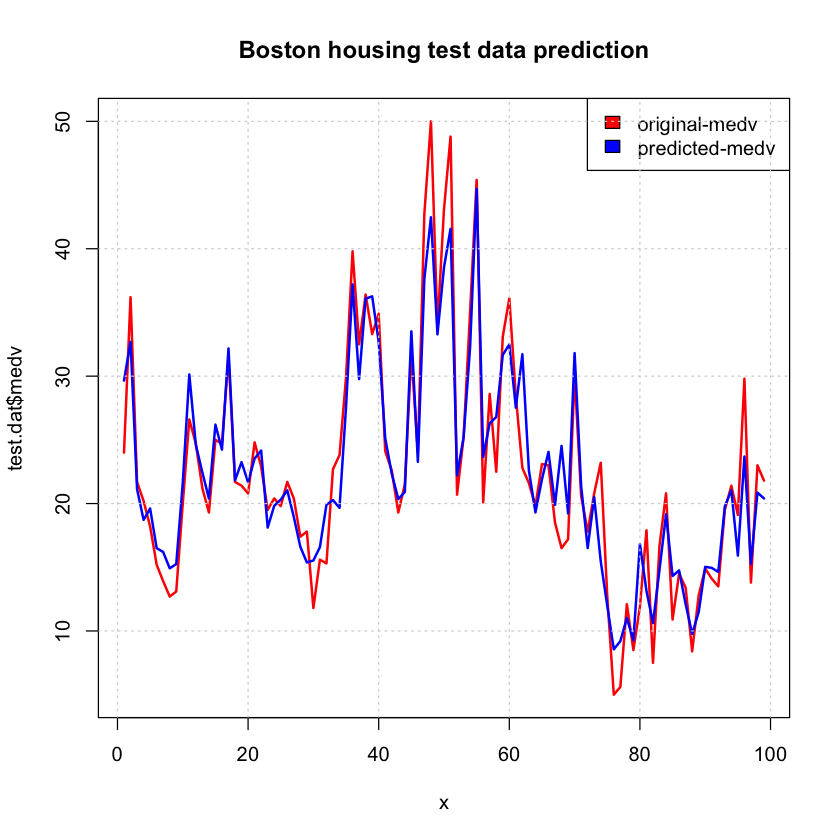

In [23]:
set.seed(3523)
fit.randomf = randomForest(medv ~ ., data = train.dat)
fit.randomf

yhat = predict(fit.randomf, newdata = test.dat)

# confusion.mat = confusionMatrix(yhat, reference = test.dat$medv)
# confusion.mat

#RMSE
caret::RMSE(test.dat$medv,yhat)

# variable importance
varImp(fit.randomf)


# LINE PLOTS TO see the performance
#predicted value vs observed values

x = 1:length(yhat)
plot(x, test.dat$medv, col = "red", type = "l", lwd = 2,
     main = "Boston housing test data prediction")
lines(x, yhat, col = "blue", lwd = 2)

legend("topright", legend = c("original-medv", "predicted-medv"),
       fill = c("red", "blue"), col = 2:3, adj = c(0, 0.6))
grid()

In [30]:
#Model tuning via R caret train function 
set.seed(738)
#mtry : the number of variables to randomly sample as condidates at each split.
# when myry = the number of features. the random forest model equates to bagging.

tune.grid = expand.grid(.mtry=1:10)
trcn = trainControl(method = "cv", number = 5) 

#train a rf model by selecting the optimal tuning parameter
rf.fit2 = train(medv~., data=train.dat,
                method="rf",
                trControl=trcn,
                tuneGrid=tune.grid)



In [31]:
rf.fit2 # training data

rf.fit2$bestTune

Random Forest 

407 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 325, 326, 325, 326, 326 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   1    4.734813  0.7856232  3.090534
   2    3.882397  0.8389062  2.472070
   3    3.632521  0.8541864  2.331694
   4    3.598002  0.8525293  2.315173
   5    3.495382  0.8606158  2.263313
   6    3.461341  0.8627470  2.260536
   7    3.441950  0.8623037  2.255286
   8    3.412840  0.8640846  2.239393
   9    3.466572  0.8601986  2.273762
  10    3.435714  0.8626859  2.264033

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 8.

,mtry
,<int>
8,8


In [32]:
yhat = predict(rf.fit2,test.dat) #testing data

#RMSE

caret::RMSE(test.dat$medv,yhat)

# which is better than the random forest model without tuning 

[1] 2.730658

# GBM model (gradient boosting machines)

In [34]:
library(caret)
library(mlbench)
library(MASS)
library(randomForest)

In [37]:
data(PimaIndiansDiabetes)
dat = PimaIndiansDiabetes
str(dat)

set.seed(252)

index = createDataPartition(dat$diabetes, p = 0.8, list = FALSE)
train.dat = dat[index,]
test.dat = dat[-index,]

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [70]:
library(gbm)
# model tuning via R caret train function
set.seed(738)

#shrinkage : the learning rate of the boosting algorithm
#interaction.depth : the maximum depth of the tree
#n.minobsinnode : the minimum number of observations in the terminal nodes

gbmgrid = expand.grid(shrinkage = 0.1,
                        n.trees = (1:30)*50,
                        interaction.depth = c(1,5,9),
                        n.minobsinnode = 20)

trcn = trainControl (method = "repeatedcv",
                     number = 10,
                     repeats=6, 
                     #estimate class probabilities 
                     classProbs = TRUE,
                     summaryFunction = twoClassSummary)


#train a rf model by selecting the optimal tuning parameter
gbm.fit = train(diabetes~., data=train.dat,
                method="gbm",
                trControl=trcn,
                # tuningLength=10,
                tuneGrid=gbmgrid)
                # metric = "ROC")

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."


In [73]:
library(gbm)
# model tuning via R caret train function
set.seed(738)

#shrinkage : the learning rate of the boosting algorithm
#interaction.depth : the maximum depth of the tree
#n.minobsinnode : the minimum number of observations in the terminal nodes

gbmgrid = expand.grid(shrinkage = 0.1,
                        n.trees = (1:30)*50,
                        interaction.depth = c(1,5,9),
                        n.minobsinnode = 20)

trcn = trainControl (method = "cv", 
                    number = 10,
                    classProbs = TRUE,
                    summaryFunction = twoClassSummary)


#train a rf model by selecting the optimal tuning parameter
gbm.fit = train(diabetes~., data=train.dat,
                method="gbm",
                trControl=trcn,
                # tuningLength=10,
                tuneGrid=gbmgrid)
                # metric = "ROC")

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2664             nan     0.1000    0.0127
     2        1.2331             nan     0.1000    0.0165
     3        1.2061             nan     0.1000    0.0140
     4        1.1852             nan     0.1000    0.0071
     5        1.1626             nan     0.1000    0.0088
     6        1.1433             nan     0.1000    0.0083
     7        1.1253             nan     0.1000    0.0080
     8        1.1108             nan     0.1000    0.0061
     9        1.0973             nan     0.1000    0.0045
    10        1.0858             nan     0.1000    0.0042
    20        0.9964             nan     0.1000    0.0030
    40        0.9173             nan     0.1000    0.0009
    60        0.8708             nan     0.1000   -0.0009
    80        0.8407             nan     0.1000   -0.0004
   100        0.8212             nan     0.1000   -0.0001
   120        0.8080             nan     0.1000   -0.0009
   140        

In [74]:
#the best tuning parameter 
gbm.fit$bestTune

,n.trees,interaction.depth,shrinkage,n.minobsinnode
,<dbl>,<dbl>,<dbl>,<dbl>
2,100,1,0.1,20


In [76]:
yhat = predict(gbm.fit,test.dat) #testing data

#confusion matrix
confusion.mat = confusionMatrix(yhat, reference = test.dat$diabetes)
confusion.mat

#variable importance
varImp(gbm.fit)

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  88  18
       pos  12  35
                                          
               Accuracy : 0.8039          
                 95% CI : (0.7321, 0.8636)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 3.3e-05         
                                          
                  Kappa : 0.5551          
                                          
 Mcnemar's Test P-Value : 0.3613          
                                          
            Sensitivity : 0.8800          
            Specificity : 0.6604          
         Pos Pred Value : 0.8302          
         Neg Pred Value : 0.7447          
             Prevalence : 0.6536          
         Detection Rate : 0.5752          
   Detection Prevalence : 0.6928          
      Balanced Accuracy : 0.7702          
                                          
       'Positive' Class : neg             
                              

gbm variable importance

         Overall
glucose  100.000
mass      35.053
age       33.035
pedigree  22.839
pregnant  13.090
pressure   5.561
insulin    2.686
triceps    0.000